# Demo2: rain predition with sklearn

ref: https://www.samloves.coffee/rainML

## 資料源

- https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017?resource=download

```
catalogs historical days of rain in the area from 1948-2017. Our data contains 5 dimensions:

DATE = the date of the observation

PRCP = the amount of precipitation, in inches

TMAX = the maximum temperature for that day, in degrees Fahrenheit

TMIN = the minimum temperature for that day, in degrees Fahrenheit

RAIN = True if rain was observed on that day, False if it was not
```

In [104]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [105]:
weather = pd.read_csv("./weather/seattleWeather_1948-2017.csv", header = 0, sep = ",")
#We can specify headers manually by adding `names=["DATE", "PRCP", "TMAX", "TMIN", "RAIN"]` to above.
#Since the first line of our data contains the headers, we'll let pandas take care of it automatically with the headers = 0 parameter.

In [106]:
weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [107]:
weather.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


### 轉換一下DATE的格式

In [108]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['DATE'] = weather['DATE'].dt.strftime('%Y%m%d')

In [109]:
weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,19480101,0.47,51,42,True
1,19480102,0.59,45,36,True
2,19480103,0.42,45,35,True
3,19480104,0.31,45,34,True
4,19480105,0.17,45,32,True


In [110]:
weather.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,20171210,0.0,49,34,False
25547,20171211,0.0,49,29,False
25548,20171212,0.0,46,32,False
25549,20171213,0.0,48,34,False
25550,20171214,0.0,50,36,False


In [111]:
weather.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [112]:
weather.isnull().values.any()

True

In [113]:
weather.isnull().values

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [114]:
weather = weather.dropna()

In [115]:
weather.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,20171210,0.0,49,34,False
25547,20171211,0.0,49,29,False
25548,20171212,0.0,46,32,False
25549,20171213,0.0,48,34,False
25550,20171214,0.0,50,36,False


In [116]:
X = weather.drop(["PRCP", "RAIN"], axis=1) #all columns except PRCP and RAIN, as both give the answer away.
y = weather["PRCP"]

In [117]:
X.head()

,DATE,TMAX,TMIN
0,19480101,51,42
1,19480102,45,36
2,19480103,45,35
3,19480104,45,34
4,19480105,45,32


In [118]:
y.head()

0    0.47
1    0.59
2    0.42
3    0.31
4    0.17
Name: PRCP, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(20438, 3)
(5110, 3)


## 選一個model
- Linear regression 是個好用的model，當資料是線性的情形
- 但是當資料是像  sin-wave，我們需要其他的model

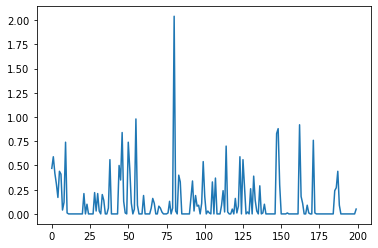

In [120]:
plt.plot(y[:200])

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

## 做predict

In [90]:
y_pred = tree_model.predict(X_test)

In [91]:
from sklearn import metrics

# MSE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  0.08556929060665362
RMSE:  0.2925222907859393


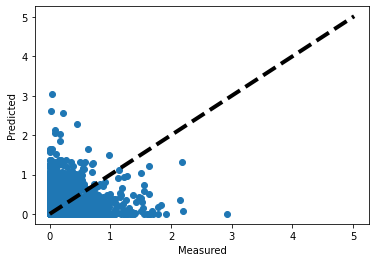

In [92]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) #lw: linewidth
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### TODO: 用 RandomForestRegressor 試試看

In [121]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [122]:
y_pred = rf_model.predict(X_test)

In [123]:
from sklearn import metrics

# MSE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  0.05272918891833522
RMSE:  0.22962837132709715


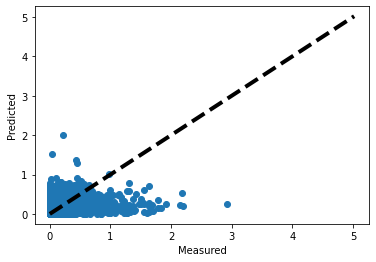

In [124]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) #lw: linewidth
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

----
## k-folder for predict
- ref: https://scikit-learn.org/stable/modules/cross_validation.html

In [127]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

X = weather.drop(["PRCP", "RAIN"], axis=1) #all columns except PRCP and RAIN, as both give the answer away.
y = weather["PRCP"]

rf_model = RandomForestRegressor()

predicted = cross_val_predict(rf_model, X, y, cv=10)

print("MSE: ", metrics.mean_squared_error(y, predicted))

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE:  0.06635972517334211
RMSE:  0.2576038143610108


## 另一種評分方式

In [87]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("\n")


from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = numpy.sqrt(-scores)

scores = cross_val_score(rf_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = numpy.sqrt(-scores)

In [88]:
display_scores(tree_rmse_scores)

Scores: [0.32306283 0.31224653 0.31099269 0.30275654 0.2907518  0.31717484
 0.32445904 0.32340533 0.30053941 0.31367286]
Mean: 0.3119061861506785
Standard deviation: 0.010519188680664258




In [89]:
display_scores(rf_rmse_scores)

Scores: [0.24728801 0.23676948 0.24266283 0.23551752 0.22380208 0.24545452
 0.23992379 0.22569013 0.22497018 0.25311353]
Mean: 0.23751920848848124
Standard deviation: 0.009612252387015198




In [93]:
[y.min(), y.max()]

[0.0, 5.02]

In [99]:
#provide date in form 19480103
def predictVsActuals(day):
    precipPredictDay = X.loc[X['DATE'] == day]
    precipPredictValue = round(rf_model.predict(precipPredictDay)[0], 3)


    precipActual = weather.loc[weather['DATE'] == day]
    precipActualValue = round(precipActual.iloc[0]["PRCP"], 3)

    print("On", precipActual.iloc[0]["DATE"], "there was a high of", precipActual.iloc[0]["TMAX"], "and a low of", precipActual.iloc[0]["TMIN"])
    print("There were", precipActualValue, "inches of rainfall")
    print("We predicted",precipPredictValue, "inches of rainfall")
    print("we were off by ", round(abs(precipActualValue-precipPredictValue), 3), "inches")
    print("\n")

In [100]:
weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,19480101,0.47,51,42,True
1,19480102,0.59,45,36,True
2,19480103,0.42,45,35,True
3,19480104,0.31,45,34,True
4,19480105,0.17,45,32,True


In [101]:
weather.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,20171210,0.0,49,34,False
25547,20171211,0.0,49,29,False
25548,20171212,0.0,46,32,False
25549,20171213,0.0,48,34,False
25550,20171214,0.0,50,36,False


In [102]:
predictVsActuals('20000101')

On 20000101 there was a high of 43 and a low of 37
There were 0.27 inches of rainfall
We predicted 0.257 inches of rainfall
we were off by  0.013 inches


